Nhân bản 2534 ảnh từ lớp NORMAL...
Found 7748 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 248s 157ms/step - accuracy: 0.5586 - loss: 1.0696 - val_accuracy: 1.0000 - val_loss: 0.4117
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 226s 138ms/step - accuracy: 0.7329 - loss: 0.7758 - val_accuracy: 0.8125 - val_loss: 0.3799
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 223s 137ms/step - accuracy: 0.7911 - loss: 0.6995 - val_accuracy: 0.7500 - val_loss: 0.4037
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 224s 135ms/step - accuracy: 0.8084 - loss: 0.6809 - val_accuracy: 0.7500 - val_loss: 0.4113
Epoch 4/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 256s 202ms/step - accuracy: 0.7645 - loss: 0.6965 - val_accuracy: 0.7500 - val_loss: 0.6560
Epoch 5/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 235s 178ms/step - accuracy: 0.8837 - loss: 0.5443 - val_accuracy: 0.8125 - val_loss: 0.5139
Epoch 6/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 23

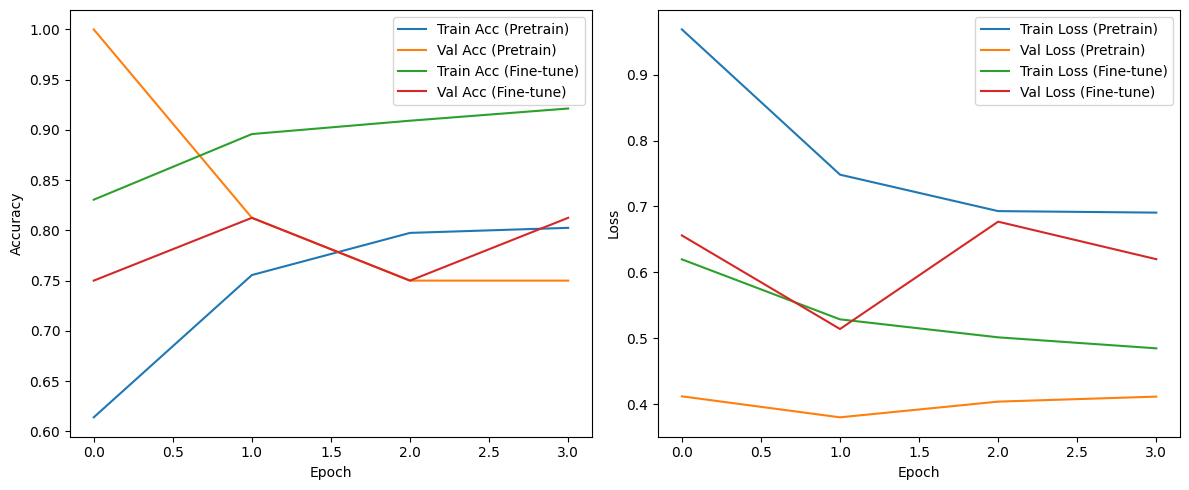

Found 624 files belonging to 2 classes.
20/20 - 4s - 221ms/step - accuracy: 0.7756 - loss: 0.6231
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix:
 [[103 131]
 [  9 381]]
Classification Report:
               precision    recall  f1-score   support

      N

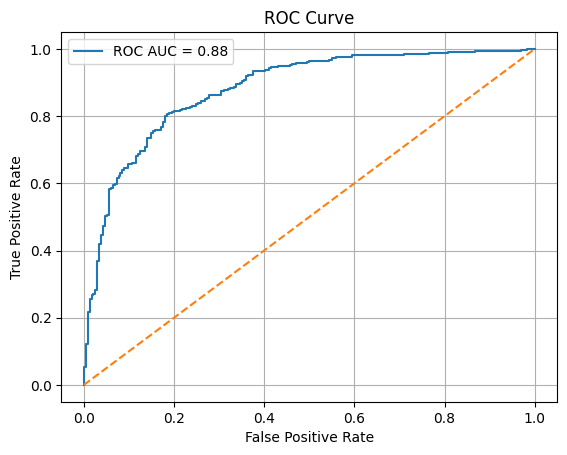

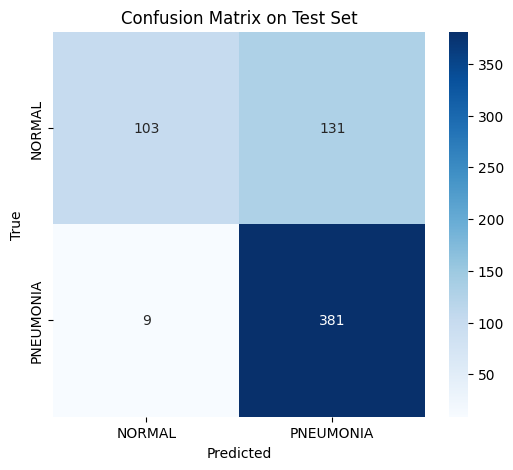

In [2]:
from tensorflow import keras
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import shutil
import random
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# 1. Hyperparameters
img_size = (224, 224)
batch_size = 32
initial_epochs = 20
fine_tune_epochs = 10
initial_lr = 1e-4

# 2. Giải nén dữ liệu nếu cần
zip_file_path = "/content/drive/MyDrive/archive (1).zip"
data_dir = "/content/chest_xray/chest_xray"
if not os.path.exists(data_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("/content")

# 3. Đường dẫn tập dữ liệu
train_path = os.path.join(data_dir, "train")
val_path = os.path.join(data_dir, "val")
test_path = os.path.join(data_dir, "test")

if not os.path.exists(train_path): raise FileNotFoundError("Không tìm thấy train/")
if not os.path.exists(val_path): raise FileNotFoundError("Không tìm thấy val/")
if not os.path.exists(test_path): raise FileNotFoundError("Không tìm thấy test/")

# ⚖️ 4. Cân bằng dữ liệu lớp thiểu số (NORMAL)
normal_dir = os.path.join(train_path, 'NORMAL')
pneumonia_dir = os.path.join(train_path, 'PNEUMONIA')

def replicate_minority_class(class_dir, target_count):
    files = os.listdir(class_dir)
    current_count = len(files)
    if current_count >= target_count:
        print("Không cần nhân bản.")
        return
    print(f"Nhân bản {target_count - current_count} ảnh từ lớp {os.path.basename(class_dir)}...")
    i = 0
    while len(os.listdir(class_dir)) < target_count:
        src_file = os.path.join(class_dir, random.choice(files))
        dst_file = os.path.join(class_dir, f"copy_{i}_{os.path.basename(src_file)}")
        shutil.copy2(src_file, dst_file)
        i += 1

n_normal = len(os.listdir(normal_dir))
n_pneumonia = len(os.listdir(pneumonia_dir))
replicate_minority_class(normal_dir, n_pneumonia)

# 5. Load dữ liệu
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)
val_ds = keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

# 6. Tiền xử lý và augmentation
from tensorflow.keras.applications.resnet50 import preprocess_input

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(factor=0.2),
    layers.RandomTranslation(0.1, 0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (data_augmentation(preprocess_input(x)), y)).shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y)).prefetch(AUTOTUNE)

# 7. Xây dựng mô hình
base_model = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(1e-4))(x)
model = keras.Model(inputs, outputs)

# 8. Compile + huấn luyện ban đầu
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=initial_lr, decay_steps=1000)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# ⚖️ Vẫn dùng class_weight vì data replication không hoàn hảo
class_weights = {0: 2.0, 1: 1.0}

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs,
    callbacks=[early_stopping],
    class_weight=class_weights
)

# 9. Fine-tuning
base_model.trainable = True
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stopping],
    class_weight=class_weights
)

# 10. Biểu đồ kết quả
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc (Pretrain)')
plt.plot(history.history['val_accuracy'], label='Val Acc (Pretrain)')
plt.plot(history_fine.history['accuracy'], label='Train Acc (Fine-tune)')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc (Fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss (Pretrain)')
plt.plot(history.history['val_loss'], label='Val Loss (Pretrain)')
plt.plot(history_fine.history['loss'], label='Train Loss (Fine-tune)')
plt.plot(history_fine.history['val_loss'], label='Val Loss (Fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 11. Đánh giá mô hình trên test set
test_ds_raw = keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=False
)
class_names = test_ds_raw.class_names
test_ds = test_ds_raw.map(lambda x, y: (preprocess_input(x), y)).prefetch(AUTOTUNE)

# Đánh giá
model.evaluate(test_ds, verbose=2)
y_true, y_pred, y_scores = [], [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_scores.extend(preds.flatten())
    y_pred.extend((preds > 0.5).astype(int).flatten())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=class_names)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Set')
plt.show()

# 12. Lưu mô hình
model.save('my_resnet50_finetuned_reliable.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


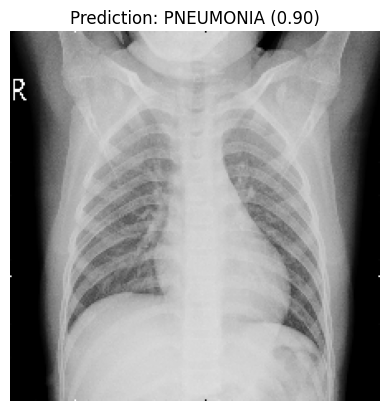

Kết quả: PNEUMONIA - Xác suất: 0.90


In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

# --- 1. Tải mô hình đã huấn luyện ---
model_path = 'my_resnet50_finetuned_reliable.keras'  # Đường dẫn mô hình đã lưu
model = keras.models.load_model(model_path)

# --- 2. Hàm dự đoán ảnh X-quang ---
def predict_image(image_path, model, img_size=(224, 224)):
    # Load và xử lý ảnh
    img = keras.utils.load_img(image_path, target_size=img_size)
    img_array = keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Dự đoán
    prob = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prob > 0.5 else "NORMAL"

    # Hiển thị ảnh và kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({prob:.2f})")
    plt.show()

    return label, prob

# --- 3. Dự đoán ảnh mẫu ---
image_path = "/content/NORMAL2-IM-1427-0001.jpeg"  # Đường dẫn ảnh test
label, score = predict_image(image_path, model)
print(f"Kết quả: {label} - Xác suất: {score:.2f}")

In [4]:
import os
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array

# --- 1. Tải mô hình ---
model = keras.models.load_model('my_resnet50_finetuned_reliable.keras')

# --- 2. Hàm xử lý và dự đoán ảnh ---
def predict_image_batch(image_dir, model, img_size=(224, 224)):
    results = []

    # Lặp qua tất cả ảnh trong thư mục
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(image_dir, filename)
            try:
                # Load và xử lý ảnh
                img = load_img(path, target_size=img_size)
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)

                # Dự đoán
                prob = model.predict(img_array, verbose=0)[0][0]
                label = "PNEUMONIA" if prob > 0.5 else "NORMAL"

                results.append({
                    "filename": filename,
                    "label": label,
                    "probability": float(prob)
                })
            except Exception as e:
                print(f"Lỗi xử lý ảnh {filename}: {e}")

    return results

# --- 3. Chạy dự đoán cho toàn bộ ảnh trong thư mục ---
image_folder = "/content/drive/MyDrive/NORMAL(1)"  # Ví dụ thư mục chứa ảnh
batch_results = predict_image_batch(image_folder, model)

# --- 4. Hiển thị kết quả ---
for r in batch_results:
    print(f"{r['filename']}: {r['label']} ({r['probability']:.2f})")

NORMAL2-IM-1438-0001.jpeg: PNEUMONIA (0.84)
NORMAL2-IM-1442-0001.jpeg: NORMAL (0.04)
NORMAL2-IM-1440-0001.jpeg: NORMAL (0.11)
NORMAL2-IM-1437-0001.jpeg: NORMAL (0.17)
NORMAL2-IM-1430-0001.jpeg: PNEUMONIA (0.58)
NORMAL2-IM-1427-0001.jpeg: PNEUMONIA (0.90)
NORMAL2-IM-1431-0001.jpeg: PNEUMONIA (0.76)
NORMAL2-IM-1436-0001.jpeg: NORMAL (0.24)
